# Data preprocessing

### Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Train and test datasets loading

We have two csv:
- train.csv: it contains 1460 samples with 80 features, along with the target variable, which is the Sale Price. We will use this as the main dataset for the practice.
- test.csv: contains 1459 samples with 80 features, but without the target.

In [ ]:
df_raw = pd.read_csv("train.csv")
df_testing = pd.read_csv("test.csv")

print("Train dataset shape:", df_raw.shape)
print("Test dataset shape:", df_testing.shape)

Train dataset shape: (1460, 81)
Test dataset shape: (1459, 80)


### Data exploration

In [3]:
df_raw.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Here, we can observe the feature types, which features contain missing values, and how many missing values each of them has.

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Data cleaning

First, we identify the numerical features with missing values in order to fill them with the mean.

In [5]:
df_raw_num = df_raw.select_dtypes(include = ['float64', 'int64']) #Select only numerical features
df_raw_num_nulls = df_raw_num.columns[df_raw_num.isnull().any()] #Get numerical features with null values
print("Numerical features with null values:", df_raw_num_nulls.tolist())

Numerical features with null values: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


We compute the mean of the three features identified above.

In [6]:
for col in df_raw_num_nulls:
    df_raw[col] = df_raw[col].fillna(df_raw[col].mean())

We list the numerical features again to verify that they were filled.

In [7]:
df_raw.select_dtypes(include = ['float64', 'int64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

Then, we look for categorical features with missing values.

In [8]:
df_raw_object = df_raw.select_dtypes(include = ['object'])
df_raw_object_nulls = df_raw_object.columns[df_raw_object.isnull().any()]
print("Numerical columns with null values:", df_raw_object_nulls.tolist())

Numerical columns with null values: ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


We drop the categorical features with missing values, leaving 65 remaining features including both categorical and numerical variables.

In [9]:
df_raw = df_raw.drop(columns=df_raw_object_nulls)
df_raw.shape

(1460, 65)

We drop the 'Id'

In [10]:
df_raw = df_raw.drop('Id', axis=1)
df_raw.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


Then we look for outliers.

In [11]:
df_raw['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

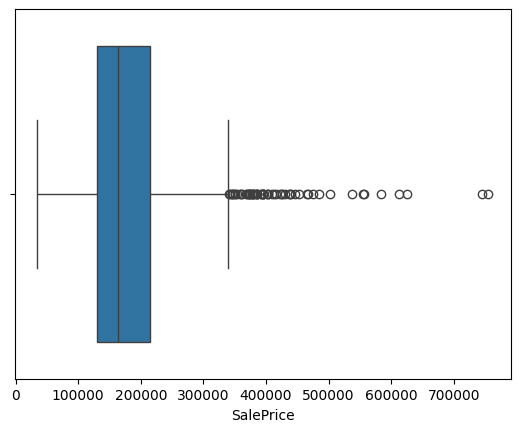

C:\Users\UX3402\AppData\Local\Temp\ipykernel_22836\676178604.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_raw['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


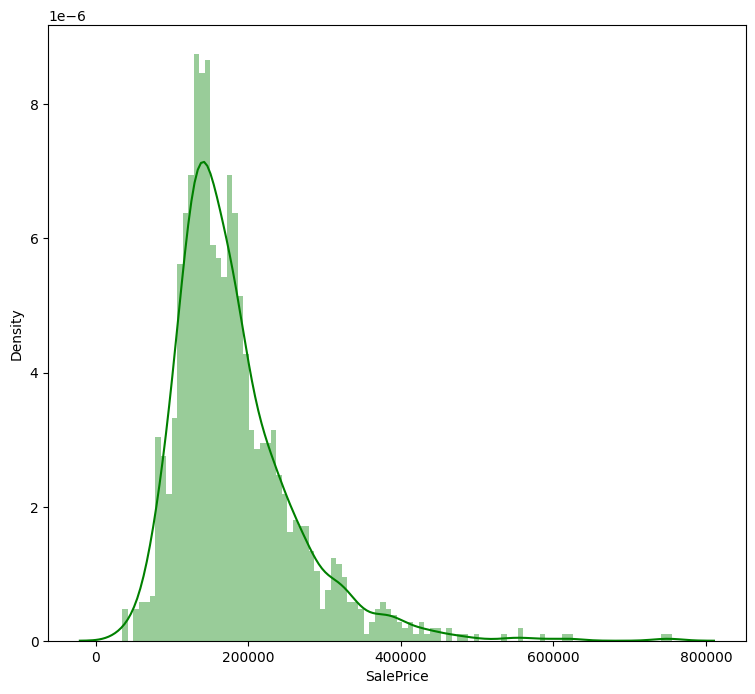

In [12]:
sns.boxplot(x=df_raw['SalePrice'])
plt.show()

plt.figure(figsize=(9, 8))
sns.distplot(df_raw['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});
plt.show()

We drop them using the Interquartile Range (IQR) Method, removing the extreme values.

In [13]:
q1, q3 = np.percentile(df_raw['SalePrice'], [25, 75])
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
df_raw = df_raw[(df_raw['SalePrice'] >= lower) & (df_raw['SalePrice'] <= upper)]

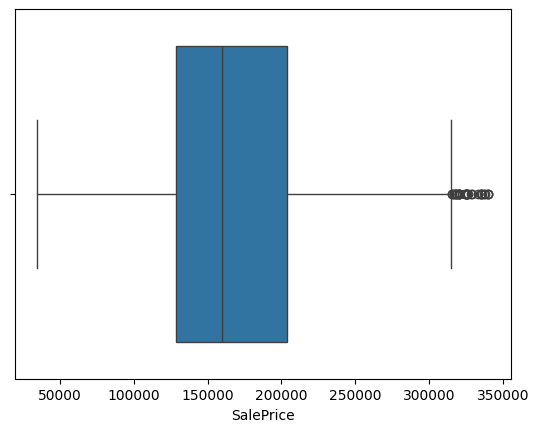

(1399, 64)

In [14]:
sns.boxplot(x=df_raw['SalePrice'])
plt.show()

df_raw.shape

count      1399.000000
mean     170237.127234
std       59230.130817
min       34900.000000
25%      129000.000000
50%      159500.000000
75%      203500.000000
max      340000.000000
Name: SalePrice, dtype: float64


C:\Users\UX3402\AppData\Local\Temp\ipykernel_22836\2209116870.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_raw['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4})


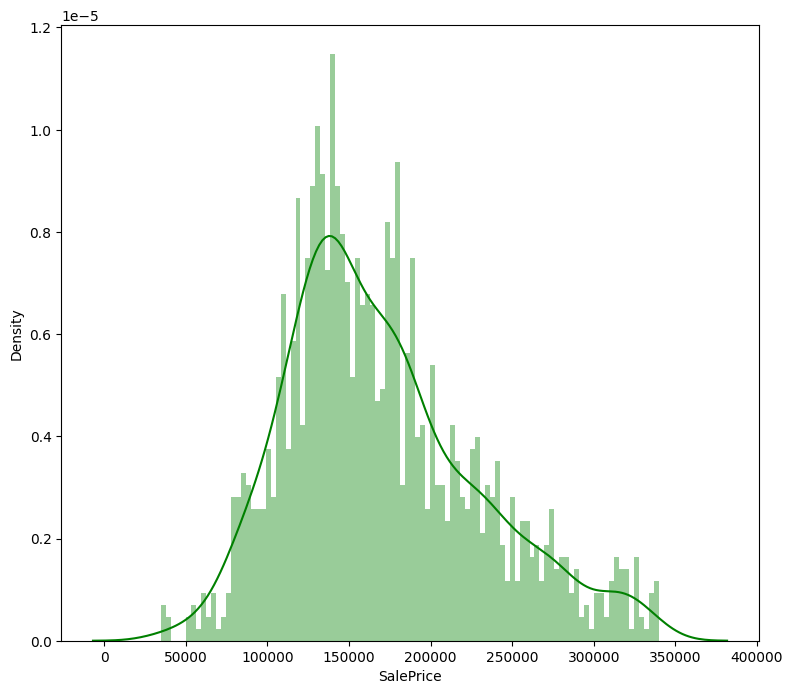

In [15]:
print(df_raw['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_raw['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4})
plt.show()

Distribution of the numerical features.

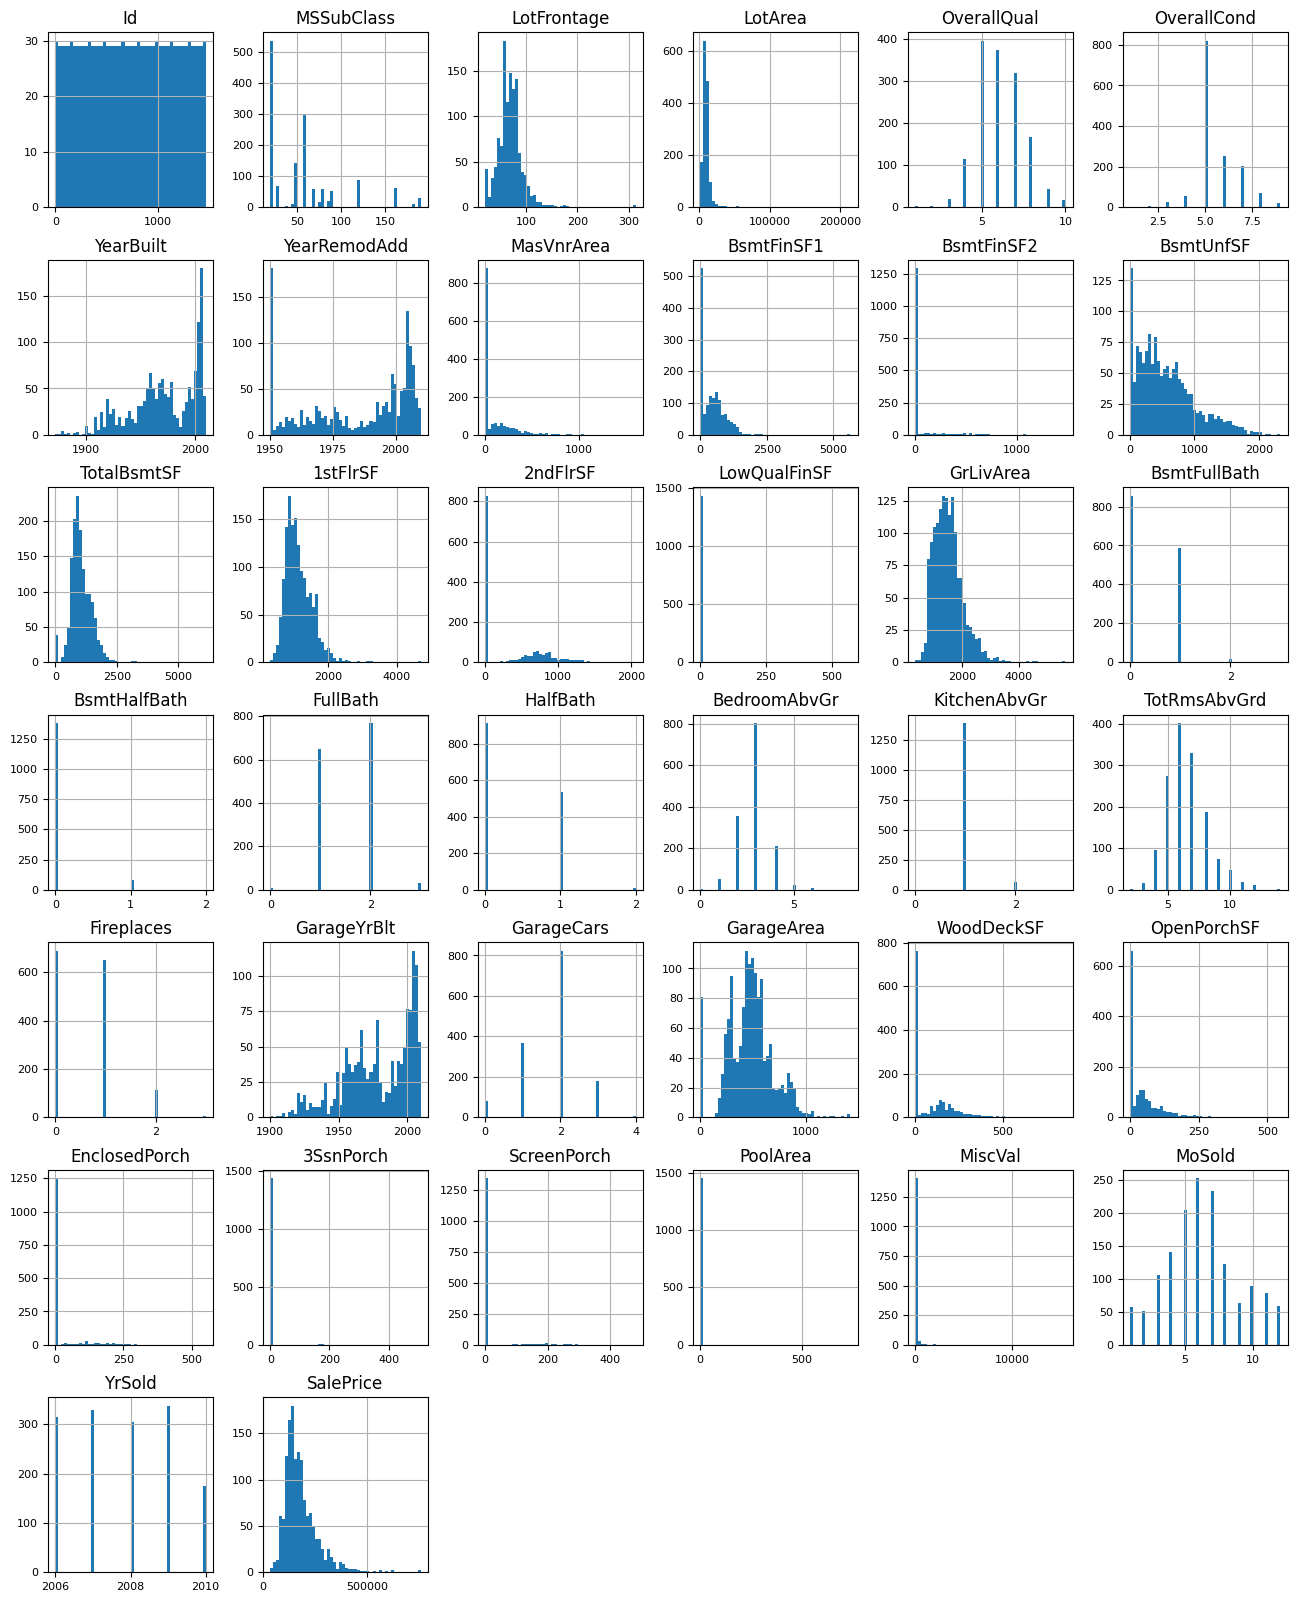

In [16]:
df_raw_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

Finally we save the clean dataset in a csv.

In [17]:
df_raw.to_csv("data_clean.csv", index=False)

### Quick test of the cleaned dataset.

In [18]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [19]:
RND = 42
np.random.seed(RND)

y = df_raw_num['SalePrice'].astype(int).values
X = df_raw_num.drop(columns=['SalePrice']).copy()

X = StandardScaler().fit_transform(X)

mu, sigma = y.mean(), y.std()
y = (y - mu) / sigma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RND)

In [20]:
regression = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
regression.fit(X_train, y_train)
y_pred = regression.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.3f}')
print(f'R²: {r2:.3f}')

RMSE: 0.381
R²: 0.880


In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=regression, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'subsample': 1.0}


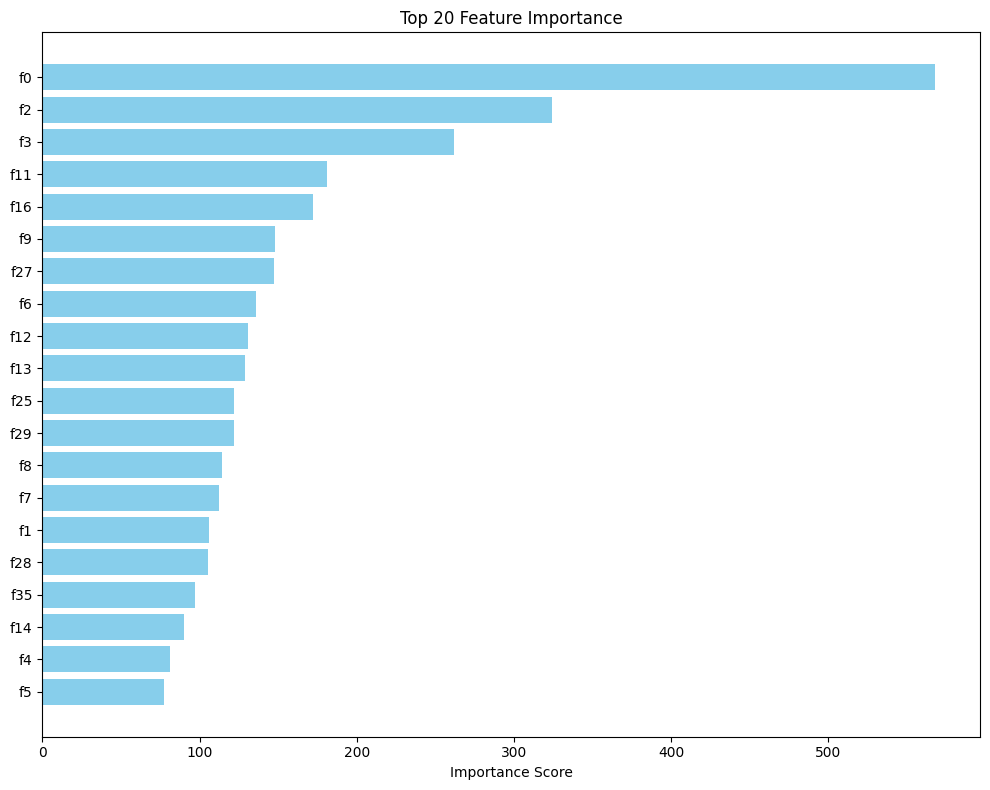

In [22]:
importance = regression.get_booster().get_score(importance_type='weight')

importance_df = pd.DataFrame({
    'Feature': list(importance.keys()),
    'Importance': list(importance.values())
}).sort_values(by='Importance', ascending=False)

top_n = 20
plt.figure(figsize=(10, 8))
plt.barh(
    importance_df['Feature'].head(top_n)[::-1],
    importance_df['Importance'].head(top_n)[::-1],
    color='skyblue'
)
plt.xlabel('Importance Score')
plt.title(f'Top {top_n} Feature Importance')
plt.tight_layout()
plt.show()

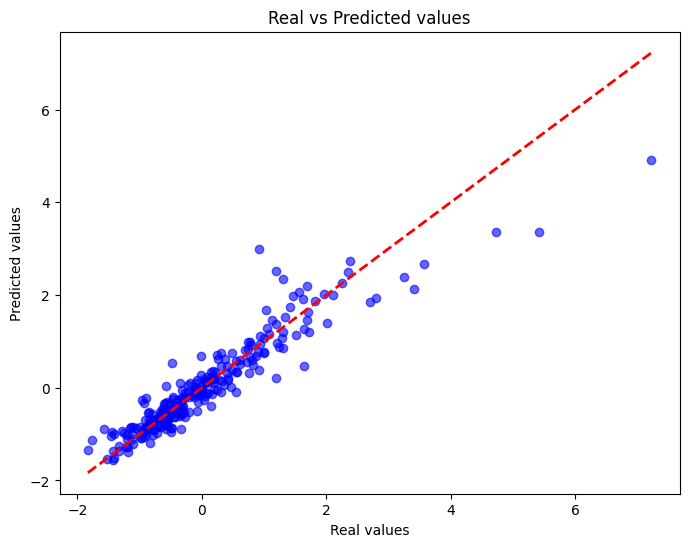

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title('Real vs Predicted values')
plt.show()
